In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [7]:
# Read in the data from the CSV file
df = pd.read_csv("customer_order_product.csv")

In [8]:
# Convert the order_date column to datetime datatype and set it as the index
df['order_date'] = pd.to_datetime(df['order_date'])
df = df.set_index("order_date")

In [9]:
# Calculate the total sales (i.e., quantity times price) for each product and month
df["sales"] = df["quantity"] * df["price"]
grouped = df.groupby(["product_type", pd.Grouper(freq="M")])["sales"].sum()



In [10]:
# Define the data and train_size
data = grouped.values
train_size = int(len(data) * 0.7)

In [11]:
# Create a dictionary for each product
products = {}
for product_type in df["product_type"].unique():
    products[product_type] = {}

    # Set the train_data and test_data arrays as values in each product dictionary
    train_data, test_data = data[:train_size], data[train_size:]
    products[product_type]["train_data"] = train_data
    products[product_type]["test_data"] = test_data

    # Fit an ARIMA model to the training data and forecast the next 3 months' sales
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=3)[0]
    products[product_type]["forecast"] = forecast


In [12]:
# Aggregate the forecasts for each product to generate a forecast for the next quarter
quarterly_forecast = pd.DataFrame(index=pd.date_range(start=df.index.max(), periods=3, freq="M"))
for product_type, data in products.items():
    forecast = data["forecast"]
    quarterly_forecast[product_type] = pd.Series(forecast, index=pd.date_range(start=df.index.max(), periods=3, freq="M"))

print(quarterly_forecast)

                    Shirt         Jacket       Trousers
2021-10-31  162656.690012  162656.690012  162656.690012
2021-11-30  162656.690012  162656.690012  162656.690012
2021-12-31  162656.690012  162656.690012  162656.690012


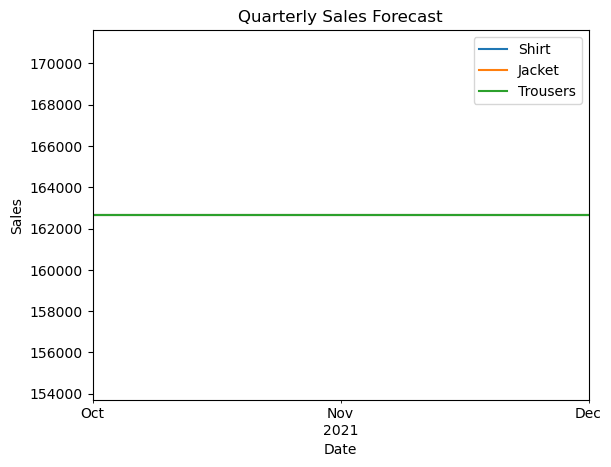

In [13]:
import matplotlib.pyplot as plt

# Plot the quarterly forecast
quarterly_forecast.plot(kind="line")

# Set the plot title and axis labels
plt.title("Quarterly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")

# Show the plot
plt.show()
